# Trabalho de Projeto Integrador 3

Nome: Carolina de Farias

Aplicação de técnicas de análise de sentimentos em reviews de produtos buscando encontrar o que foi falado negativamente sobre um determinado produto.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import nltk
nltk.download('punkt')
import numpy as np
import re
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\carol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Sobre a base de dados

A base fornecida pela olist tem a seguinte estrutura mostrada abaixo.

In [3]:
data = pd.read_csv("olist_order_reviews_dataset.csv")

In [4]:
data_frame = pd.DataFrame(data=data)

In [5]:
data_frame 

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [6]:
negative_review_score = data_frame.query('review_score >= 0 and review_score < 3')
print('Esse são as negativas', len(negative_review_score))

neutral_review_score = data_frame.query('review_score == 3') 
print('Essas sao as neutras',len(neutral_review_score))

positive_review_score = data_frame.query('review_score >= 4 and review_score <= 5')
print('Essas são as positivas',len(positive_review_score))

Esse são as negativas 14575
Essas sao as neutras 8179
Essas são as positivas 76470


In [7]:
#elimintando as colunas com valores ausentes
all_reviews = data_frame.dropna(subset=['review_comment_message'], axis=0)['review_comment_message']

all_revies_score = data_frame.dropna(subset=['review_score'], axis=0)['review_score']


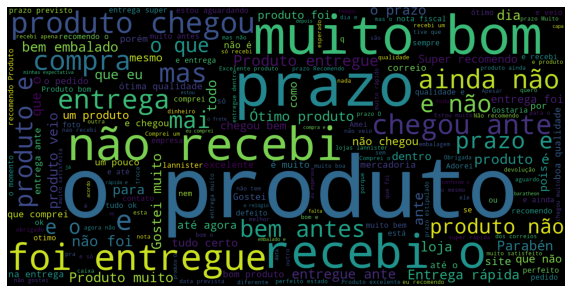

In [8]:
# concatenar as palavras
all_summary = " ".join(i for i in all_reviews)
 
# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os","ma"])
 
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(all_summary)
 
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wordcloud);
wordcloud.to_file("palavrasmaisutilizadassemclassificacao.png")

In [9]:
negative_review_score = data_frame.query('(review_score >= 0) and (review_score < 3) and (review_comment_message != "") and (review_comment_message.notnull())',engine='python')
print('Esse são as negativas', len(negative_review_score))

neutral_review_score = data_frame.query('review_score == 3 and (review_comment_message != "") and (review_comment_message.notnull())',engine='python') 
print('Essas sao as neutras',len(neutral_review_score))

positive_review_score = data_frame.query('review_score >= 4 and review_score <= 5 and (review_comment_message != "") and (review_comment_message.notnull())',engine='python')
print('Essas são as positivas',len(positive_review_score))



Esse são as negativas 10890
Essas sao as neutras 3557
Essas são as positivas 26530


# Etapa 2  - Pré processamento dos dados
É preciso realizar uma filtragem dos dados, já que existem dados que não são interessantes para o processo de treinamento, linhas em branco, além de definir quais classificações seriam consideradas positivas ou negativas.

In [2]:
data = pd.read_csv("olist_order_reviews_dataset.csv")
# Como a nossa base possui diversas colunas, vamos pegar apenas as que interessam, que é o comentário e o score.
data = data[['review_comment_message','review_score']]

#Remoção de emojis
data['review_comment_message'] = data['review_comment_message'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)

#Separando as classificações positivas e negativas e pegando só o comentário conforme o tipo de review,além de retirar as linhas que não possuem comentário nenhum.
positive = data[ data['review_score'] >= 4]
positive = positive['review_comment_message']
positive = positive.dropna(axis=0)


negative = data[ data['review_score'] <= 3]
negative = negative['review_comment_message']
negative = negative.dropna(axis=0)

#Filtro para retirar classificações que se refiram a entrega, vendedor ou transporte, entretanto, se existe a palavra produto no review, devemos desconsidera-la de qualquer forma.
#1- Filtro pela palavra produto
#2- Filtro com as invalidas
#3- Drop nessas ultimas
invalid_reviews_comment_message = 'vendedor|entrega|transporte|prazo|recebi|correio|entregue|loja|lojas'
valid_reviews_comment_message = 'produto|Produto|mercadoria|objeto|mochila|mercadoria'

positive_drop =positive[positive.str.contains(invalid_reviews_comment_message) & ~positive.str.contains(valid_reviews_comment_message)] # o problema desse filtro é q as vezes a pessoa diz exatamente qual é o produto e então ele vai ser cortado
positive = pd.concat([positive_drop, positive])
positive = positive.drop_duplicates(keep=False)

negative_drop =negative[negative.str.contains(invalid_reviews_comment_message) & ~negative.str.contains(valid_reviews_comment_message)] # o problema desse filtro é q as vezes a pessoa diz exatamente qual é o produto e então ele vai ser cortado
negative = pd.concat([negative_drop, negative])
negative = negative.drop_duplicates(keep=False)

#Adicionando index a cada dataset, começando sempre do 0.
positive = positive.reset_index()
negative = negative.reset_index()

#Transformando nossos dados comentários na espécie de uma "coluna" da tabela
ser_pos = pd.Series(positive['review_comment_message']) 
ser_neg = pd.Series(negative['review_comment_message']) 

<ipython-input-2-4abdc85283d6>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  data['review_comment_message'] = data['review_comment_message'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)


In [3]:
#Tokenização
pos_tokenized = ser_pos.str.split()

neg_tokenized = ser_neg.str.split()

In [4]:
print('Não-Tokenizado\n')
print(ser_pos[21])
print('Tokenizado\n')
print(pos_tokenized[21])

Não-Tokenizado

Entrega muito rápida
Parabéns
Tokenizado

['Entrega', 'muito', 'rápida', 'Parabéns']


In [5]:
#Stemming -> Reduz a palavra a sua raiz
# Como fica
#amigos	amig
#1	amigas	amig
#2	amizade	amizad
#3	carreira	carr
#4	carreiras	carr
#O problema é q não é garantido q palavra exista, mas mesmo assim, ainda é possível extrair a informação da palavra;
# Mas em geral, a ideia é que diversas palavras sejam reduzidas a uma  só, sendo: Falando, falar, falamos, falais, falam, falei,
#falarão 
#Todos estas palavras podem ser reduzidas ao radical fala;
#Assim, não ficamos presos a palvras especificas e também o algoritmo vai ser capaz de reconhecer derivaçoes q ele não conhecia
import re, string, nltk

from string import punctuation
from unidecode import unidecode

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

stemmer = nltk.RSLPStemmer()

def limpar_dados(dados):
    # Remover as palavras de cada linha do data frame
    pontuacao = [ponto for ponto in punctuation]
    palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")
    # adicionando pontuacao na lista de stopwords
    stopwords = palavras_irrelevantes + pontuacao + ['...']
    token_pontuacao = nltk.WordPunctTokenizer()
    # Limpando dados desnecessarios
    coluna_filtrada= list()
    i = 0
    for opiniao in dados:
        i += 1
        nova_frase = list()
        for palavra in opiniao:
            if palavra.lower() not in stopwords: # stopwords
                nova_frase.append(stemmer.stem(unidecode(palavra)))
        coluna_filtrada.append(nova_frase)

    # Sobrescrevendo a coluna text_pt
    return coluna_filtrada


In [6]:
pos_data = limpar_dados(pos_tokenized)

neg_data= limpar_dados(neg_tokenized)

In [7]:
#junta todas as palavras tokenizadas
def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token
            
all_pos_words = get_all_words(pos_data)
all_neg_words = get_all_words(neg_data)

In [8]:
#Obtendo as palavras com maior frequência

from nltk import FreqDist

freq_dist_pos = FreqDist(all_pos_words)
freq_dis_neg = FreqDist(all_neg_words)

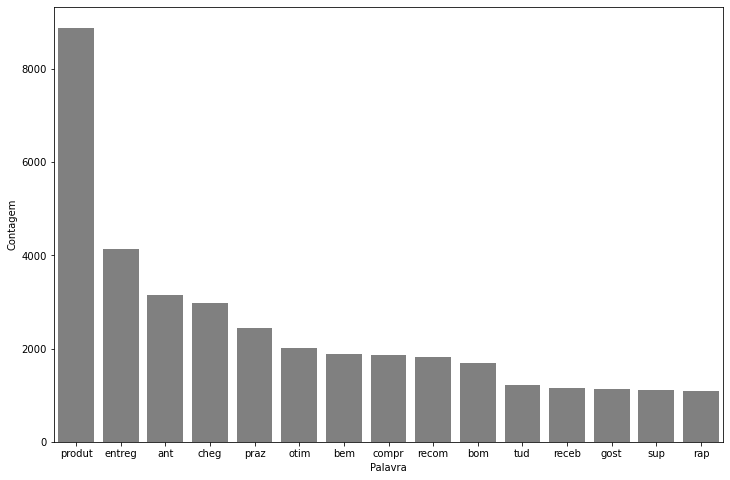

In [9]:
import seaborn as sns

df_frequencia = pd.DataFrame({"Palavra": list(freq_dist_pos.keys()),
                              "Frequência": list(freq_dist_pos.values())})

df_frequencia.sort_values(by='Frequência', inplace=True, ascending=False)
df_frequencia.head()

# Plotar as palavras mais comuns da base de dados
plt.figure(figsize=(12,8))
ax = sns.barplot(data = df_frequencia.head(15), x = "Palavra", y = "Frequência", color = 'gray')
ax.set(ylabel = "Contagem")
plt.show()

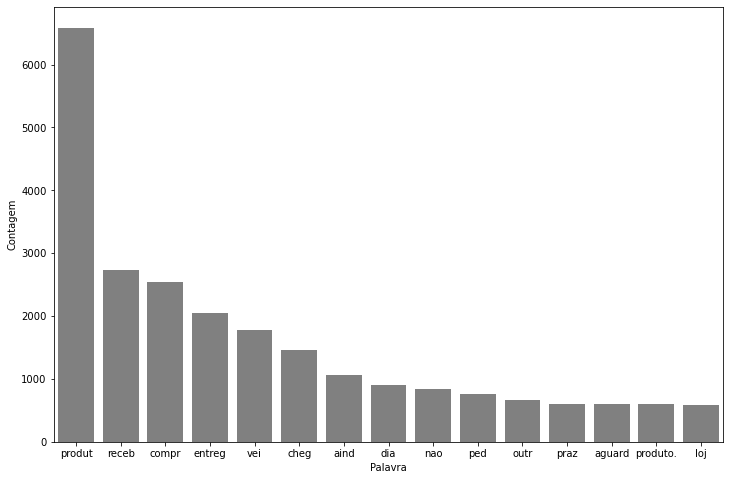

In [10]:
import seaborn as sns

df_frequencia = pd.DataFrame({"Palavra": list(freq_dis_neg.keys()),
                              "Frequência": list(freq_dis_neg.values())})

df_frequencia.sort_values(by='Frequência', inplace=True, ascending=False)
df_frequencia.head()

# Plotar as palavras mais comuns da base de dados
plt.figure(figsize=(12,8))
ax = sns.barplot(data = df_frequencia.head(15), x = "Palavra", y = "Frequência", color = 'gray')
ax.set(ylabel = "Contagem")
plt.show()

# Etapa 3  -  Treinamento e obteção de resultados dos algorítmos de machine learning.

Nessa etapa, os modelos serão treinados e validados, em que a acurácia de cada algoritmo será encontrada e por fim, será escolhido melhor modelo.

In [11]:
def get_reviews_for_model(cleaned_tokens_list):
    for reviews_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in reviews_tokens)

positive_tokens_for_model = get_reviews_for_model(pos_data)
negative_tokens_for_model = get_reviews_for_model(neg_data)

In [12]:
import random

positive_dataset = [(review_dict, "Positive")
                     for review_dict in positive_tokens_for_model]

negative_dataset = [(review_dict, "Negative")
                     for review_dict in negative_tokens_for_model]

dataset = positive_dataset + negative_dataset

print(len(dataset))

random.shuffle(dataset)

# 1 Teste 80% de dados para treino e 20% para teste
train_data = dataset[:22088]
test_data = dataset[22088:]

27611


In [13]:
#print('Tamanho dos dados de teste')
len(test_data)
#print('Tamanho dos dados de treino')
#len(train_data)


5523

In [14]:
import nltk.classify

from sklearn.svm import LinearSVC
from nltk import classify 

classifier = nltk.classify.SklearnClassifier(LinearSVC())
classifier.train(train_data)

accuracy = classify.accuracy(classifier, test_data)
print("[Linear SVC]Accuracy is:", accuracy)

[Linear SVC]Accuracy is: 0.8430200977729495


In [15]:
from nltk import classify
from nltk import NaiveBayesClassifier
classifier = NaiveBayesClassifier.train(train_data)

print("[Naive Bayes]Accuracy is:", classify.accuracy(classifier, test_data))

print(classifier.show_most_informative_features(10))

[Naive Bayes]Accuracy is: 0.8471845011768966
Most Informative Features
                  estorn = True           Negati : Positi =     81.7 : 1.0
             insatisfeit = True           Negati : Positi =     60.3 : 1.0
                    pess = True           Negati : Positi =     46.2 : 1.0
                   nada. = True           Negati : Positi =     40.0 : 1.0
                      pi = True           Negati : Positi =     37.9 : 1.0
                  soluca = True           Negati : Positi =     33.0 : 1.0
                   parab = True           Positi : Negati =     32.1 : 1.0
                     ame = True           Positi : Negati =     30.9 : 1.0
                reembols = True           Negati : Positi =     29.8 : 1.0
                 respost = True           Negati : Positi =     29.8 : 1.0
None


In [16]:
from sklearn.naive_bayes import BernoulliNB
from nltk.classify.scikitlearn import SklearnClassifier

BNB_classifier = SklearnClassifier(BernoulliNB())
BNB_classifier.train(train_data)
print("BernoulliNB accuracy percent:",nltk.classify.accuracy(BNB_classifier, test_data))

BernoulliNB accuracy percent: 0.8254571790693463


In [17]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC

print("Original Naive Bayes Algo accuracy percent:", (nltk.classify.accuracy(classifier, test_data))*100)
#classifier.show_most_informative_features(15)

BernoulliNB_classifier = SklearnClassifier(BernoulliNB())
BernoulliNB_classifier.train(train_data)
print("BernoulliNB_classifier accuracy percent:", (nltk.classify.accuracy(BernoulliNB_classifier, test_data))*100)

LinearSVC_classifier = SklearnClassifier(LinearSVC())
LinearSVC_classifier.train(train_data)
print("LinearSVC_classifier accuracy percent:", (nltk.classify.accuracy(LinearSVC_classifier, test_data))*100)

LogisticRegression_classifier = SklearnClassifier(LogisticRegression())
LogisticRegression_classifier.train(train_data)
print("LogisticRegression_classifier accuracy percent:", (nltk.classify.accuracy(LogisticRegression_classifier, test_data))*100)

Original Naive Bayes Algo accuracy percent: 84.71845011768966
BernoulliNB_classifier accuracy percent: 82.54571790693464
LinearSVC_classifier accuracy percent: 84.30200977729496
LogisticRegression_classifier accuracy percent: 86.6195908021003


D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
#Imputando uma frase qualquer para testar o nosso algoritmo já treinado
from nltk.tokenize import word_tokenize

def remove_noise(review_tokens):

    cleaned_tokens = []

    for token  in review_tokens:
        pontuacao = [ponto for ponto in punctuation]
        palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")
        # adicionando pontuacao na lista de stopwords
        stopwords = palavras_irrelevantes + pontuacao + ['...']
        token = stemmer.stem(unidecode(token))
        if len(token) > 0 and token not in string.punctuation and token.lower() not in stopwords:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens


custom_review = "Eu odiei esse produto, a perna da mesa veio quebrada."

custom_tokens = remove_noise(word_tokenize(custom_review))

print(LogisticRegression_classifier.classify(dict([token, True] for token in custom_tokens)))

Negative


In [19]:
custom_review = "Eu amei esse produto, a cor dele é incrível!."

custom_tokens = remove_noise(word_tokenize(custom_review))

print(LogisticRegression_classifier.classify(dict([token, True] for token in custom_tokens)))

Positive


In [20]:
custom_review = "Não sei o que pensar sobre esse produto, mas a entrega foi boa!"

custom_tokens = remove_noise(word_tokenize(custom_review))

print(LogisticRegression_classifier.classify(dict([token, True] for token in custom_tokens)))

Negative


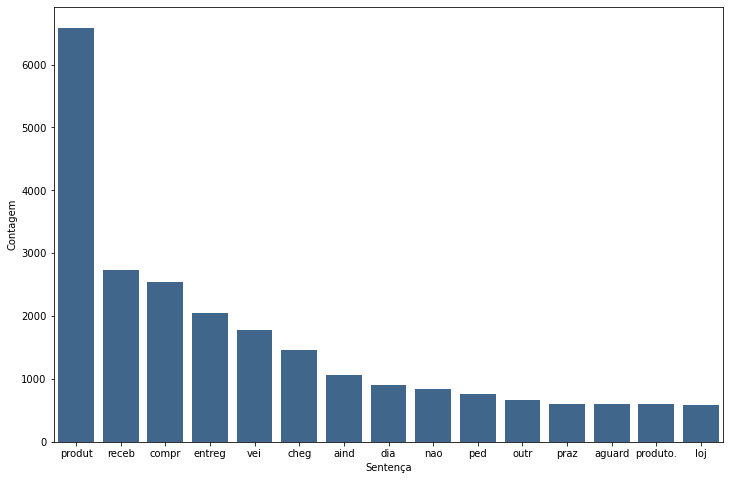

In [21]:
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud
import matplotlib.pyplot as plt


frequencia = nltk.FreqDist(freq_dis_neg)
df_frequencia = pd.DataFrame({"Sentença": list(frequencia.keys()),
                              "Frequência": list(frequencia.values())})

df_frequencia.sort_values(by='Frequência', inplace=True, ascending=False)

# Plotar as palavras mais comuns da base de dados
plt.figure(figsize=(12,8))
frequencia
ax = sns.barplot(data = df_frequencia.head(15), x = "Sentença", y = "Frequência",  color=(0.2, 0.4, 0.6))
ax.set(ylabel = "Contagem")
plt.show()

In [22]:
custom_tokens = remove_noise(
    word_tokenize("Excelente celular! A bateria me surpreendeu muito, saí de um iPhone SE 2016 e as diferenças de câmera e bateria são enormes.. recomendo muito pra quem deseja um celular com câmeras boas. O desempenho é impecável pra qualquer aplicativo."))
custom_tokens1 = remove_noise(
    word_tokenize("Meu celular veio com uma mancha tipo um pingo no vidro interno da câmera."))

print('Avaliacao Pos 1' + 
      '  --->  ' +  
      LogisticRegression_classifier.classify(
          dict([token, True]
               for token in custom_tokens
              )) + '\n')
print('Avaliacao Pos 2' + 
      '  --->  ' + 
      LogisticRegression_classifier.classify(dict([token, True] 
                               for token in custom_tokens1
                              ))+ '\n')

Avaliacao Pos 1  --->  Positive

Avaliacao Pos 2  --->  Negative



# Etapa 4 - Validação de resultados

Após ter o modelo treinado e testado, foi feita a validação de resultados. Para isso, foi utilizado uma nova base com aproximadamente 100 comentários de reviews, obtidos na loja Casas Bahia, sobre o celular Iphone, afim de entender o que foi mais falado negativamente sobre esse produto.

In [29]:
negativas =[]
positivas = []

avaliacoes = pd.read_csv("TESTEBASE.csv",names=['avaliacao_mensagem'],  skiprows=1, encoding='utf-8')

avaliacoes = avaliacoes['avaliacao_mensagem'].values.tolist()


for avaliacao in avaliacoes:
    avaliacao_tokenizada = word_tokenize(avaliacao)
    palavra =  remove_noise(avaliacao_tokenizada)
    polaridade = LogisticRegression_classifier.classify(dict([avaliacao_tokenizada, True]for avaliacao_tokenizada in palavra))
    if(polaridade == "Positive"):
        positivas.append(avaliacao)
    else:
        negativas.append(avaliacao)

In [142]:
def nuvem_palavras_filtradas(texto):
    
    # Juntando todos os textos na mesma string
    todas_palavras = ' '.join([texto for texto in texto])
    
     # lista de stopword
    stopwords = STOPWORDS.update(["o","se","em","esperava","pelo"])
    
    # Gerando a nuvem de palavras
    nuvem_palvras = WordCloud(stopwords=stopwords,width= 800, height= 500,
                              max_font_size = 110,
                              collocations = False).generate(todas_palavras)
    # Plotando nuvem de palavras
    plt.figure(figsize=(24,12))
    plt.imshow(nuvem_palvras, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    

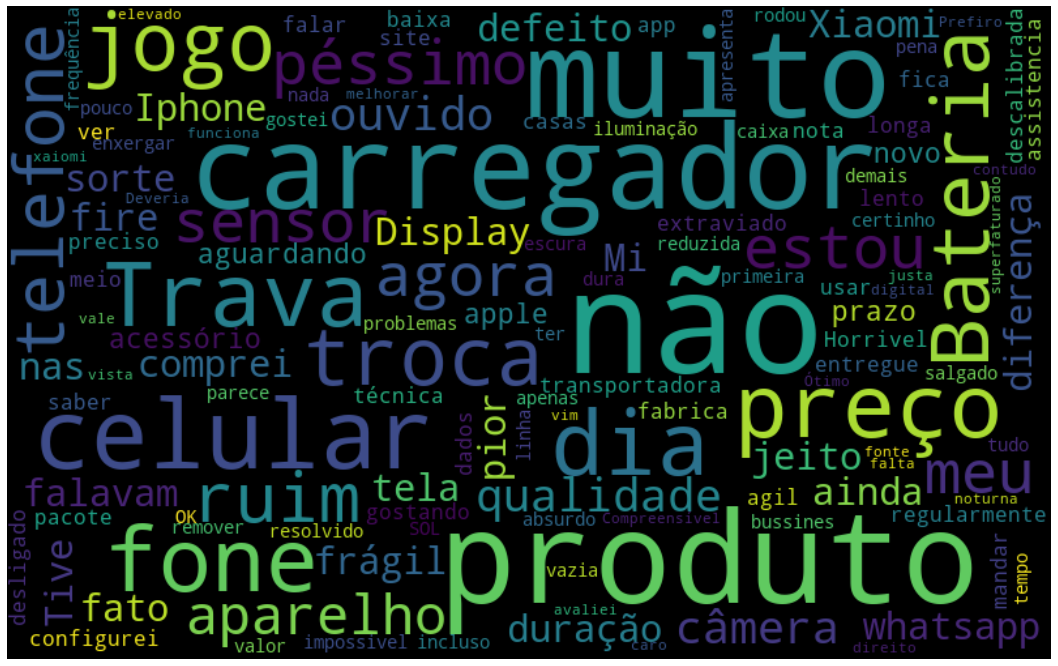

In [143]:
nuvem_palavras_filtradas(negativas)